In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./resources/extinction/60min_x1_summary.csv', header=[0])
df

,1h_RET,1h_EXT,1h_EM,1h_SRT,6h_RET,6h_EXT,6h_EM,6h_SRT
0,67.500000,31.836667,16.116667,15.833333,48.066667,26.530000,5.000000,26.400000
1,38.600000,22.335833,7.783333,16.950000,37.216667,17.485000,10.566667,14.716667
2,36.933333,24.539167,13.600000,27.516667,64.166667,19.810833,19.733333,53.633333
3,67.783333,33.275833,26.100000,42.783333,32.766667,39.707500,20.000000,23.616667


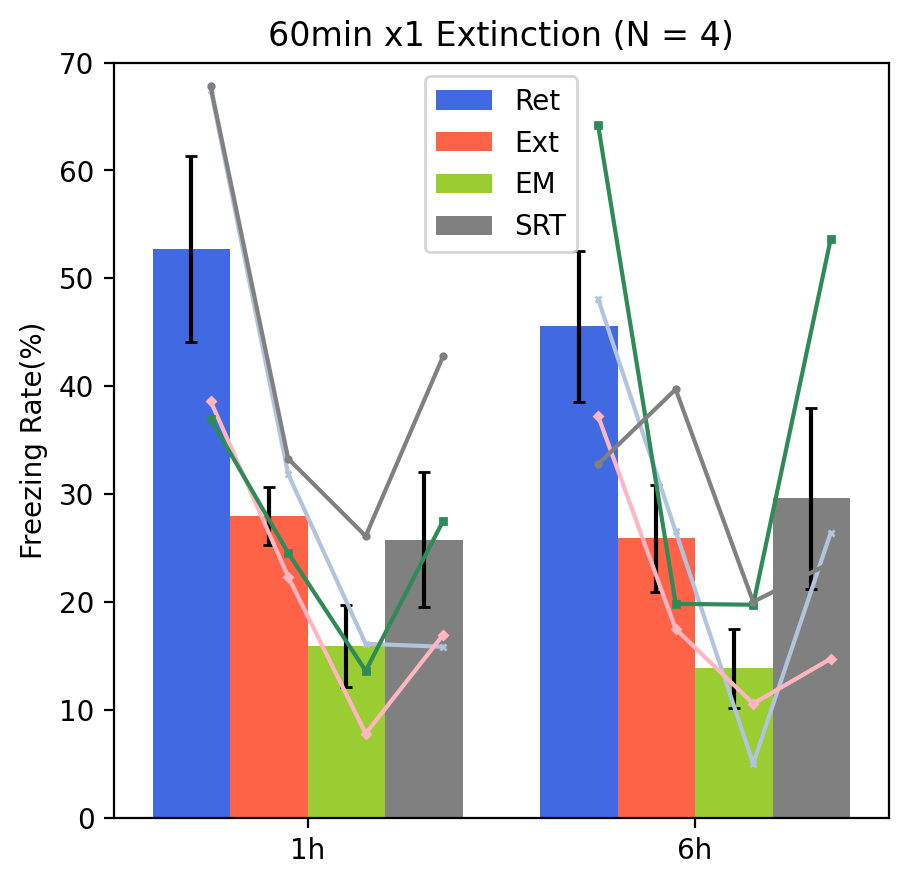

In [9]:
labels = np.array(['1h', '6h'])

ret = df.iloc[:, [0, 4]]
ext = df.iloc[:, [1, 5]]
em  = df.iloc[:, [2, 6]]
srt = df.iloc[:, [3, 7]]

ret_mean, ret_sem = ret.mean(), ret.sem()
ext_mean, ext_sem = ext.mean(), ext.sem()
em_mean, em_sem   = em.mean(), em.sem()
srt_mean, srt_sem = srt.mean(), srt.sem()

left = np.arange(-0.1, 1.1, 1.0)
width = 0.20

fig, ax = plt.subplots(figsize=(5, 5), dpi=200)

ax.bar(x=left - width, height=ret_mean, yerr=ret_sem, capsize=2, width=width, label='Ret', align='center', color='royalblue')
ax.bar(x=left, height=ext_mean, yerr=ext_sem, capsize=2, width=width, label='Ext', align='center', color='tomato')
ax.bar(x=left + width, height=em_mean, yerr=em_sem, capsize=2, width=width, label='EM', align='center', color='yellowgreen')
ax.bar(x=left + width * 2, height=srt_mean, yerr=srt_sem, capsize=2, width=width, label='SRT', align='center', color='gray')
ax.set_xticks([0.0, 1.0])
ax.set_xticklabels(labels=labels)

# plt.scatter([-0.25] * 4, ret.iloc[:, 0], c='lightsteelblue', zorder=12, s=15, marker='x')
# plt.scatter([-0.05] * 4, ext.iloc[:, 0], c='lightpink', zorder=12, s=15, marker='x')
# plt.scatter([0.15] * 4, em.iloc[:, 0], c='seagreen', zorder=12, s=15, marker='x')
# plt.scatter([0.35] * 4, srt.iloc[:, 0], c='grey', zorder=12, s=15, marker='x')
# 
# plt.scatter([0.75] * 4, ret.iloc[:, 1], c='lightsteelblue', zorder=12, s=15, marker='x')
# plt.scatter([0.95] * 4, ext.iloc[:, 1], c='lightpink', zorder=12, s=15, marker='x')
# plt.scatter([1.15] * 4, em.iloc[:, 1], c='seagreen', zorder=12, s=15, marker='x')
# plt.scatter([1.35] * 4, srt.iloc[:, 1], c='grey', zorder=12, s=15, marker='x')

x_1h = list(np.arange(-0.25, 0.36, 0.2))
x_6h = list(np.arange(0.75, 1.36, 0.2))

colors = [
    'lightsteelblue',
    'lightpink',
    'seagreen',
    'grey'
]
markers = ['x', 'D', 's', 'o']
for animal_number in range(4):
    plt.plot(x_1h, df.iloc[animal_number, 0:4], zorder=12, markersize=2, marker=markers[animal_number], c=colors[animal_number])
    plt.plot(x_6h, df.iloc[animal_number, 4:], zorder=12, markersize=2, marker=markers[animal_number], c=colors[animal_number])

ax.set_ylim(0, 70)
ax.set_xlim(-0.5, 1.5)
ax.set_ylabel('Freezing Rate(%)')
ax.set_title('60min x1 Extinction (N = 4)')
ax.legend()
fig.show()